<a href="https://colab.research.google.com/github/Dev2104/data-science/blob/main/Final_BD_%26_CC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt

# dataset loading


df = pd.read_excel("online_retail_II.xlsx")

print("Original Dataset Shape:", df.shape)
print(df.head())


# cleaning the data

df.columns = df.columns.str.strip()
df = df.dropna(subset=["Customer ID"])
df = df[df["Quantity"] > 0]
df = df[df["Price"] > 0]
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["Revenue"] = df["Quantity"] * df["Price"]
print("Cleaned Dataset Shape:", df.shape)
df["Month"] = df["InvoiceDate"].dt.to_period("M")
df["Hour"] = df["InvoiceDate"].dt.hour




Original Dataset Shape: (525461, 8)
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
Cleaned Dataset Shape: (407664, 9)


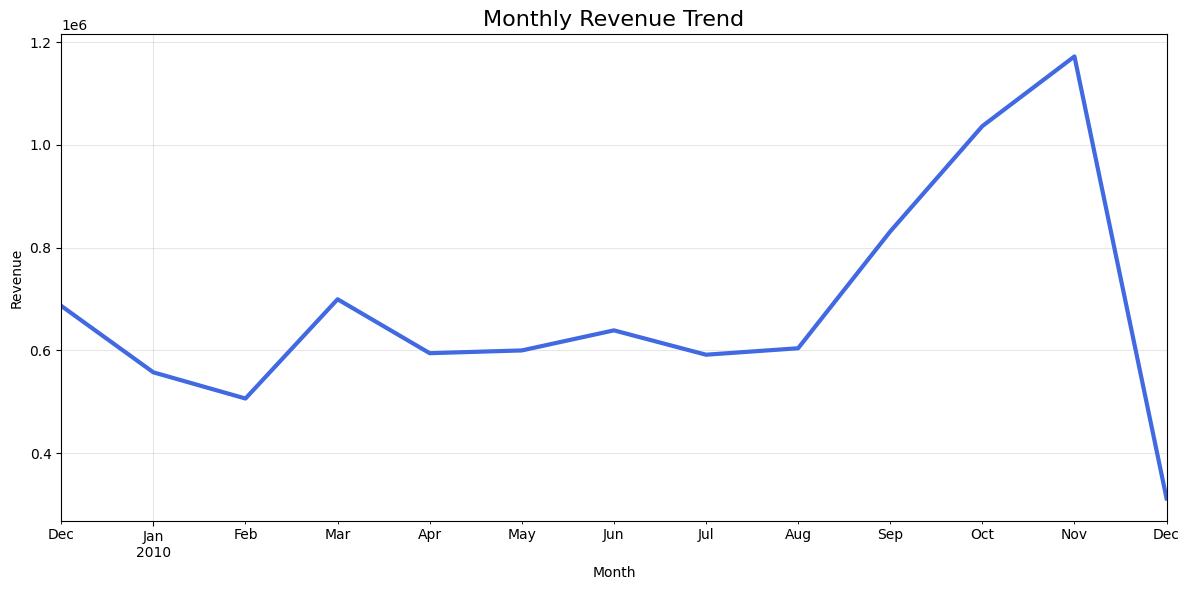

In [2]:

# monthly revenue
monthly_sales = df.groupby("Month")["Revenue"].sum()

plt.figure(figsize=(12,6))

monthly_sales.plot(
    color="royalblue",
    linewidth=3
)

plt.title("Monthly Revenue Trend", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

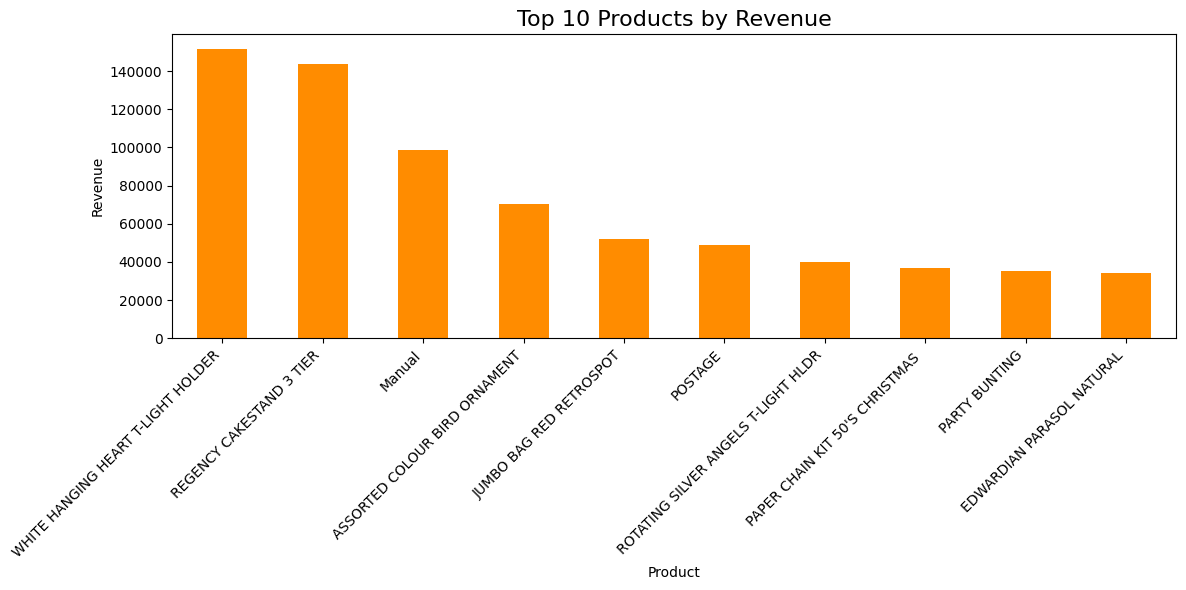

In [3]:
#top products analysis
top_products = (
    df.groupby("Description")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12,6))

top_products.plot(
    kind="bar",
    color="darkorange"
)

plt.title("Top 10 Products by Revenue", fontsize=16)
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

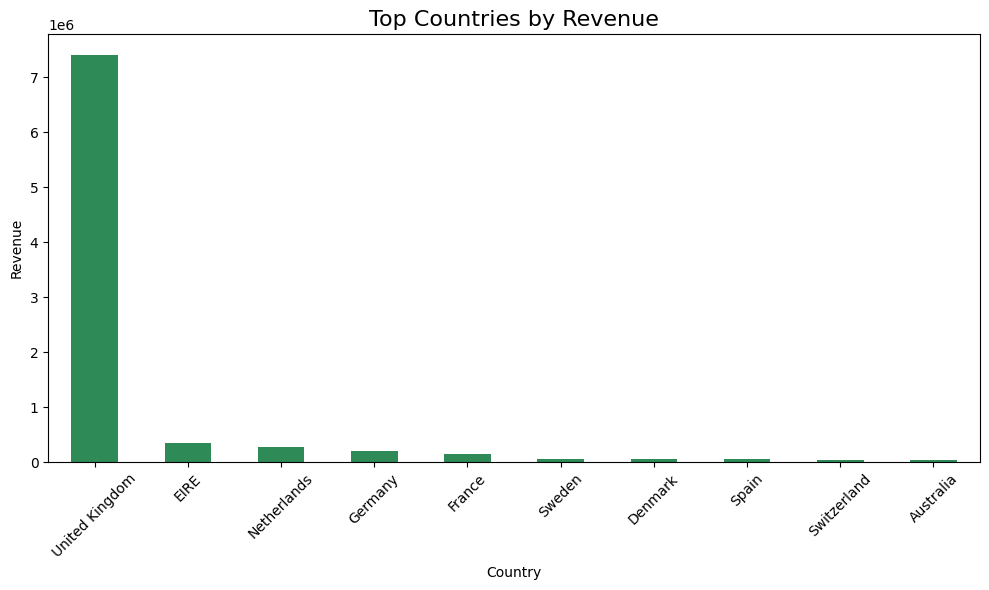

In [4]:
# country wise sales
country_sales = (
    df.groupby("Country")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))

country_sales.plot(
    kind="bar",
    color="seagreen"
)

plt.title("Top Countries by Revenue", fontsize=16)
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

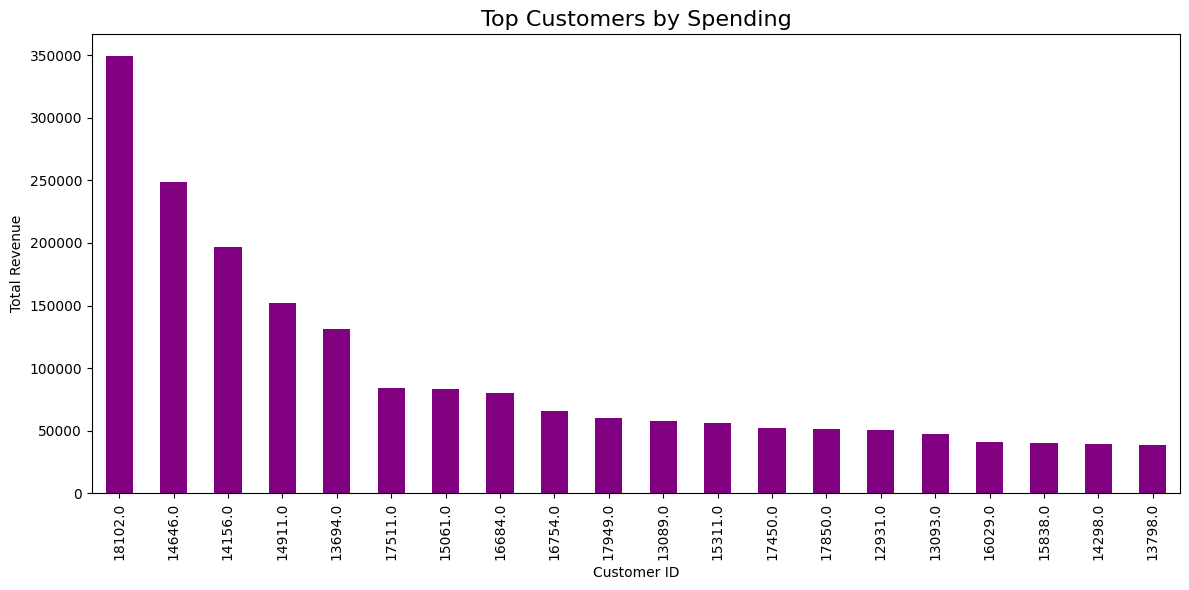

In [5]:
# Customer value analysis

customer_value = (
    df.groupby("Customer ID")["Revenue"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12,6))

customer_value.head(20).plot(
    kind="bar",
    color="purple"
)

plt.title("Top Customers by Spending", fontsize=16)
plt.xlabel("Customer ID")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

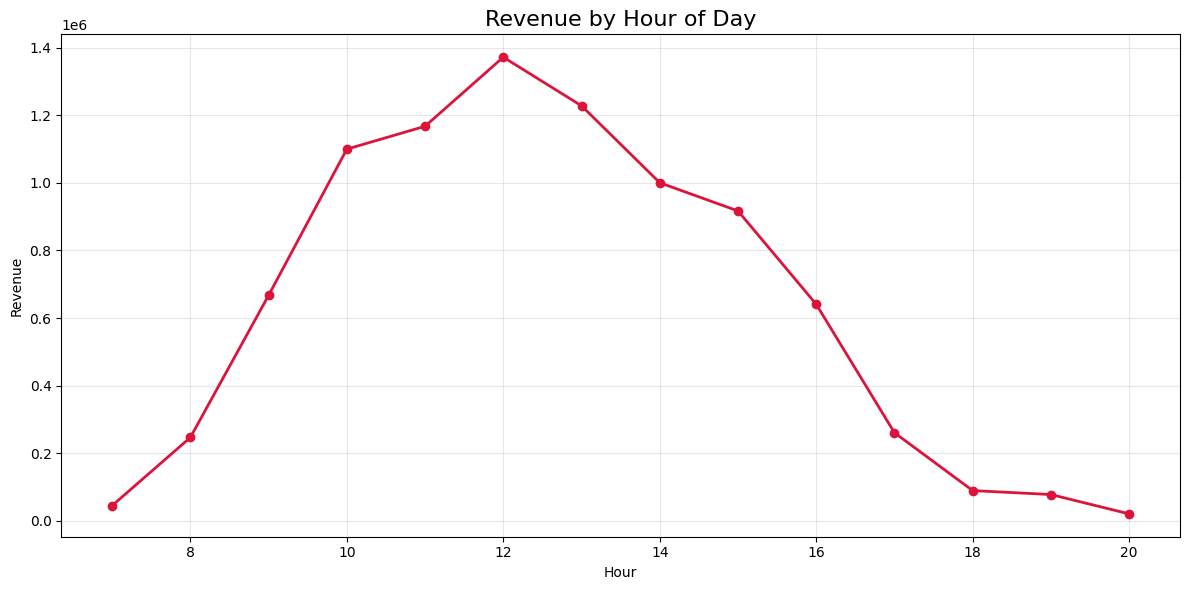

In [6]:

# Hourly sales trend


hourly_sales = df.groupby("Hour")["Revenue"].sum()
plt.figure(figsize=(12,6))

hourly_sales.plot(
    color="crimson",
    marker="o",
    linewidth=2
)

plt.title("Revenue by Hour of Day", fontsize=16)
plt.xlabel("Hour")
plt.ylabel("Revenue")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [7]:
# summary output
print("\nTop Products:\n", top_products)
print("\nTop Countries:\n", country_sales)
print("\nTop Customers:\n", customer_value.head())


Top Products:
 Description
WHITE HANGING HEART T-LIGHT HOLDER     151624.31
REGENCY CAKESTAND 3 TIER               143893.35
Manual                                  98560.64
ASSORTED COLOUR BIRD ORNAMENT           70493.83
JUMBO BAG RED RETROSPOT                 51759.30
POSTAGE                                 48741.08
ROTATING SILVER ANGELS T-LIGHT HLDR     40186.65
PAPER CHAIN KIT 50'S CHRISTMAS          36933.50
PARTY BUNTING                           35035.90
EDWARDIAN PARASOL NATURAL               34044.75
Name: Revenue, dtype: float64

Top Countries:
 Country
United Kingdom    7414755.963
EIRE               356085.210
Netherlands        268786.000
Germany            202395.321
France             146215.420
Sweden              53171.390
Denmark             50906.850
Spain               47601.420
Switzerland         43921.390
Australia           31446.800
Name: Revenue, dtype: float64

Top Customers:
 Customer ID
18102.0    349164.35
14646.0    248396.50
14156.0    196566.74
14911